# Web Scraping - Construcción del Dataset

Definimos 4 categorías de noticias:

* Policiales
* Deportes
* Políticas
* Reconquista (locales)

Para cada categoría, extrajimos:

* url (sitio web donde se publicó el artículo)
* título (título del artículo)
* cuerpo o texto (contenido del artículo)

Utilizando estos datos obtenidos, construimos el dataset en formato csv.

In [1]:
# !pip install requests
import requests
from bs4 import BeautifulSoup

In [2]:
def extraer_cuerpos (url):
  '''Función para extraer el cuerpo de las noticias'''
  # Hacemos una solicitud a la página web
  response = requests.get(url)

  # Creamos un objeto BeautifulSoup con el contenido de la página
  soup = BeautifulSoup(response.content, 'html.parser')

  # Buscamos las noticias en las categorías correspondientes
  cuerpo = soup.find("div", {'class': 'post-body entry-content'})
  parrafos = cuerpo.find_all('p')

  texto=''

  for i in parrafos:
    if len(i.text) > 0:
      texto = texto + (i.text)

  texto = texto.replace('\nLEER MÁS\n','').replace('\nFacebook\n','').replace('\nWhatsapp\n','').replace('\xa0','').replace('\nTwitter\n','').replace('\n','')

  return texto

In [3]:
# Definimos la URL de la página a la que deseamos acceder
url_policiales = 'https://reconquistanoticias.blogspot.com/search/label/Policiales.'
url_deportes= 'https://reconquistanoticias.blogspot.com/search/label/Deportes.'
url_politicas = 'https://reconquistanoticias.blogspot.com/search/label/Politica.'
url_reconquista = 'https://reconquistanoticias.blogspot.com/search/label/Reconquista'

# Hacemos una solicitud a la página web
response_policiales = requests.get(url_policiales)
response_deportes = requests.get(url_deportes)
response_politicas = requests.get(url_politicas)
response_reconquista = requests.get(url_reconquista)

# Creamos un objeto BeautifulSoup con el contenido de la página
soup1 = BeautifulSoup(response_policiales.content, 'html.parser')
soup2 = BeautifulSoup(response_deportes.content, 'html.parser')
soup3 = BeautifulSoup(response_politicas.content, 'html.parser')
soup4 = BeautifulSoup(response_reconquista.content, 'html.parser')

# Buscamos las noticias en las categorías correspondientes
noticias_policiales = soup1.find("div", {'class': 'blog-posts hfeed'})
noticias_deportes = soup2.find("div", {'class': 'blog-posts hfeed'})
noticias_politicas = soup3.find("div", {'class': 'blog-posts hfeed'})
noticias_reconquista = soup4.find("div", {'class': 'blog-posts hfeed'})

In [4]:
# Extraemos lista de titulos de las noticias
lista_titulo_policiales = []
for titulo in noticias_policiales.find_all('h3'):
    lista_titulo_policiales.append(titulo.text.replace('\n',''))

lista_titulo_deportes = []
for titulo in noticias_deportes.find_all('h3'):
    lista_titulo_deportes.append(titulo.text.replace('\n',''))

lista_titulo_politicas = []
for titulo in noticias_politicas.find_all('h3'):
    lista_titulo_politicas.append(titulo.text.replace('\n',''))

lista_titulo_reconquista = []
for titulo in noticias_reconquista.find_all('h3'):
    lista_titulo_reconquista.append(titulo.text.replace('\n',''))

In [5]:
# Buscamos todos los links que figuran en la noticia
lista_previa1 = []
for link in noticias_policiales.find_all('a'):
    lista_previa1.append(link.get('href'))
# Extraemos solo los links de interés
lista_links_policiales = []
for i, link in enumerate(lista_previa1):
  # El elemento siguiente a 'None' es el link de la noticia
  if link==None:
    lista_links_policiales.append(lista_previa1[i+1])

lista_previa2 = []
for link in noticias_deportes.find_all('a'):
    lista_previa2.append(link.get('href'))
# Extraemos solo los links de interés
lista_links_deportes = []
for i, link in enumerate(lista_previa2):
  # El elemento siguiente a 'None' es el link de la noticia
  if link==None:
    lista_links_deportes.append(lista_previa2[i+1])

lista_previa3 = []
for link in noticias_politicas.find_all('a'):
    lista_previa3.append(link.get('href'))
# Extraemos solo los links de interés
lista_links_politicas = []
for i, link in enumerate(lista_previa3):
  # El elemento siguiente a 'None' es el link de la noticia
  if link==None:
    lista_links_politicas.append(lista_previa3[i+1])

lista_previa4 = []
for link in noticias_reconquista.find_all('a'):
    lista_previa4.append(link.get('href'))
# Extraemos solo los links de interés
lista_links_reconquista = []
for i, link in enumerate(lista_previa4):
  # El elemento siguiente a 'None' es el link de la noticia
  if link==None:
    lista_links_reconquista.append(lista_previa4[i+1])

### Construcción del dataset final

In [6]:
import pandas as pd

In [7]:
# DataFrame deportes
df_deportes = pd.DataFrame(columns=['url', 'titulo', 'cuerpo', 'categoria'])
df_deportes['url'] = lista_links_deportes
df_deportes['titulo'] = lista_titulo_deportes
df_deportes['categoria'] = 'Deportes'

lista = []
for i, url in enumerate(df_deportes['url']):
  lista.append(extraer_cuerpos(url))
df_deportes['cuerpo'] = lista

In [8]:
# DataFrame policiales
df_policiales = pd.DataFrame(columns=['url', 'titulo', 'cuerpo', 'categoria'])
df_policiales['url'] = lista_links_policiales
df_policiales['titulo'] = lista_titulo_policiales
df_policiales['categoria'] = 'Policiales'

lista = []
for i, url in enumerate(df_policiales['url']):
  lista.append(extraer_cuerpos(url))
df_policiales['cuerpo'] = lista

In [9]:
# DataFrame politicas
df_politicas = pd.DataFrame(columns=['url', 'titulo', 'cuerpo', 'categoria'])
df_politicas['url'] = lista_links_politicas
df_politicas['titulo'] = lista_titulo_politicas
df_politicas['categoria'] = 'Politicas'

lista=[]
for i, url in enumerate(df_politicas['url']):
  lista.append(extraer_cuerpos(url))
df_politicas['cuerpo'] = lista

In [10]:
# DataFrame Reconquista
df_reconquista = pd.DataFrame(columns=['url', 'titulo', 'cuerpo', 'categoria'])
df_reconquista['url'] = lista_links_reconquista
df_reconquista['titulo'] = lista_titulo_reconquista
df_reconquista['categoria'] = 'Reconquista'

lista=[]
for i, url in enumerate(df_reconquista['url']):
  lista.append(extraer_cuerpos(url))
df_reconquista['cuerpo'] = lista

In [11]:
# Concatenamos todos los dataframes
datos = pd.concat([df_deportes, df_policiales, df_politicas, df_reconquista], axis=0, ignore_index=True)

In [12]:
# Exportamos dataframe en formato csv
datos.to_csv('noticias.csv', index=False)

# Modelo de clasificación de noticias en categorías específicas

A partir de los datos de título y categoría del dataset, entrenamos un modelo para clasificar las noticias en categorías.

Utilizamos modelo LinearRegression para realizar la clasificación por categoría y TfidfVectorizer como vectorizador.

NLTK se usó para encontrar las stopwords

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df = pd.read_csv('noticias.csv')
df.head()

,url,titulo,cuerpo,categoria
0,https://reconquistanoticias.blogspot.com/2023/...,Se realizó un torneo de posta Americana en Rec...,"El pasado sábado 28 de octubre de 2023, en hor...",Deportes
1,https://reconquistanoticias.blogspot.com/2023/...,Nadadores del Club Adelante participaran en la...,Se trata de cuatro nadadores del Club Atlético...,Deportes
2,https://reconquistanoticias.blogspot.com/2023/...,La patinadora Manuela Sánchez estará participa...,"El día Martes 24 de octubre de 2023, el comité...",Deportes
3,https://reconquistanoticias.blogspot.com/2023/...,Nadadores del Reconquista Tenis Club dijeron p...,El certamen se realizó el pasado sábado 21 de ...,Deportes
4,https://reconquistanoticias.blogspot.com/2023/...,Nadadores del Reconquista Tenis Club estarán p...,El sábado 21 de Octubre de 2023 el Equipo de ...,Deportes


In [15]:
# Preparar X e y
X = df['titulo'].tolist()
y = df['categoria'].tolist()

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print('')
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 0.6666666666666666

Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

    Deportes       1.00      0.57      0.73         7
  Policiales       0.60      0.50      0.55         6
   Politicas       0.45      1.00      0.62         5
 Reconquista       1.00      0.67      0.80         6

    accuracy                           0.67        24
   macro avg       0.76      0.68      0.67        24
weighted avg       0.79      0.67      0.68        24



---



### Prueba del modelo para categorizar nuevas frases

In [16]:
# Definimos una lista de frases para clasificar
nuevas_frases = ["Fuerte cruce entre la policía y dos ladrones en un robo a una casa",
    "Un nuevo club de futbol se alzó con el torneo nacional.",
    "Las calles de la zona sur de Reconquista fueron asfaltadas.",
    "En 2023 habrá elecciones de nuevo presidente para la Argentina."]

# Convertimos las frases a minúsculas
nuevas_frases = [frase.lower() for frase in nuevas_frases]

# Transformamos las nuevas frases usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevas_frases)

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas frases
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La frase '{nuevas_frases[i]}' pertenece a la categoría: {etiqueta}")

La frase 'fuerte cruce entre la policía y dos ladrones en un robo a una casa' pertenece a la categoría: Politicas
La frase 'un nuevo club de futbol se alzó con el torneo nacional.' pertenece a la categoría: Deportes
La frase 'las calles de la zona sur de reconquista fueron asfaltadas.' pertenece a la categoría: Reconquista
La frase 'en 2023 habrá elecciones de nuevo presidente para la argentina.' pertenece a la categoría: Politicas


# Procesamiento y normalización del texto - Nubes de palabras
Para cada categoría, realizamos procesamiento del texto mediante recursos de normalización y limpieza.

Luego, con lo obtenido, realizamos conteo de palabras y mostramos su importancia mediante un gráfico de nube de palabras.

Utilizamos la librería Spacy, la cual proporciona funciones de procesamiento de texto, incluyendo tokenización, lematización y detección de números y stopwords. Se usó el modelo de lenguaje español es_core_news_md.

In [19]:
!pip install spacy
!python -m spacy download es_core_news_md

2023-11-06 02:14:02.660769: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 02:14:02.660849: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 02:14:02.660903: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 02:14:03.908318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [20]:
import spacy
nlp = spacy.load('es_core_news_md')

In [21]:
# Categoria: deportes

# Lista de oraciones
oraciones_deportes = []
for i in df_deportes['cuerpo']:
  oraciones_deportes.append(i)

tokens = []

for oracion in oraciones_deportes:
    # Procesamos el texto con el modelo de spaCy
    doc = nlp(oracion)

    for token in doc:
      # Eliminamos stopwords, signos de puntuacion y números
      if not token.is_stop and not token.is_punct and not token.is_digit:
        tokens.append(token.text.lower())

# Diccionario para contar palabras
contador_palabras_dep = {}

for palabra in tokens:
  if palabra in contador_palabras_dep:
    contador_palabras_dep[palabra] += 1
  else:
    contador_palabras_dep[palabra] = 1

In [22]:
# Categoria: policiales

# Lista de oraciones
oraciones_policiales = []
for i in df_policiales['cuerpo']:
  oraciones_policiales.append(i)

tokens = []

for oracion in oraciones_policiales:
    # Procesamos el texto con el modelo de spaCy
    doc = nlp(oracion)

    for token in doc:
      # Eliminamos stopwords, signos de puntuacion y números
      if not token.is_stop and not token.is_punct and not token.is_digit:
        tokens.append(token.text.lower())

contador_palabras_policial = {}

for palabra in tokens:
  if palabra in contador_palabras_policial:
    contador_palabras_policial[palabra] += 1
  else:
    contador_palabras_policial[palabra] = 1

In [23]:
# Categoria: politicas

# Lista de oraciones
oraciones_politicas = []
for i in df_politicas['cuerpo']:
  oraciones_politicas.append(i)

tokens = []

for oracion in oraciones_politicas:
    # Procesamos el texto con el modelo de spaCy
    doc = nlp(oracion)

    for token in doc:
      # Eliminamos stopwords, signos de puntuacion y números
      if not token.is_stop and not token.is_punct and not token.is_digit:
        tokens.append(token.text.lower())

contador_palabras_politicas = {}

for palabra in tokens:
  if palabra in contador_palabras_politicas:
    contador_palabras_politicas[palabra] += 1
  else:
    contador_palabras_politicas[palabra] = 1

In [24]:
# Categoria: reconquista

# Lista de oraciones
oraciones_reconquista = []
for i in df_reconquista['cuerpo']:
  oraciones_reconquista.append(i)

tokens = []

for oracion in oraciones_reconquista:
    # Procesamos el texto con el modelo de spaCy
    doc = nlp(oracion)

    for token in doc:
      # Eliminamos stopwords, signos de puntuacion y números
      if not token.is_stop and not token.is_punct and not token.is_digit:
        tokens.append(token.text.lower())

contador_palabras_rec = {}

for palabra in tokens:
  if palabra in contador_palabras_rec:
    contador_palabras_rec[palabra] += 1
  else:
    contador_palabras_rec[palabra] = 1

### Gráficos de nubes de palabras

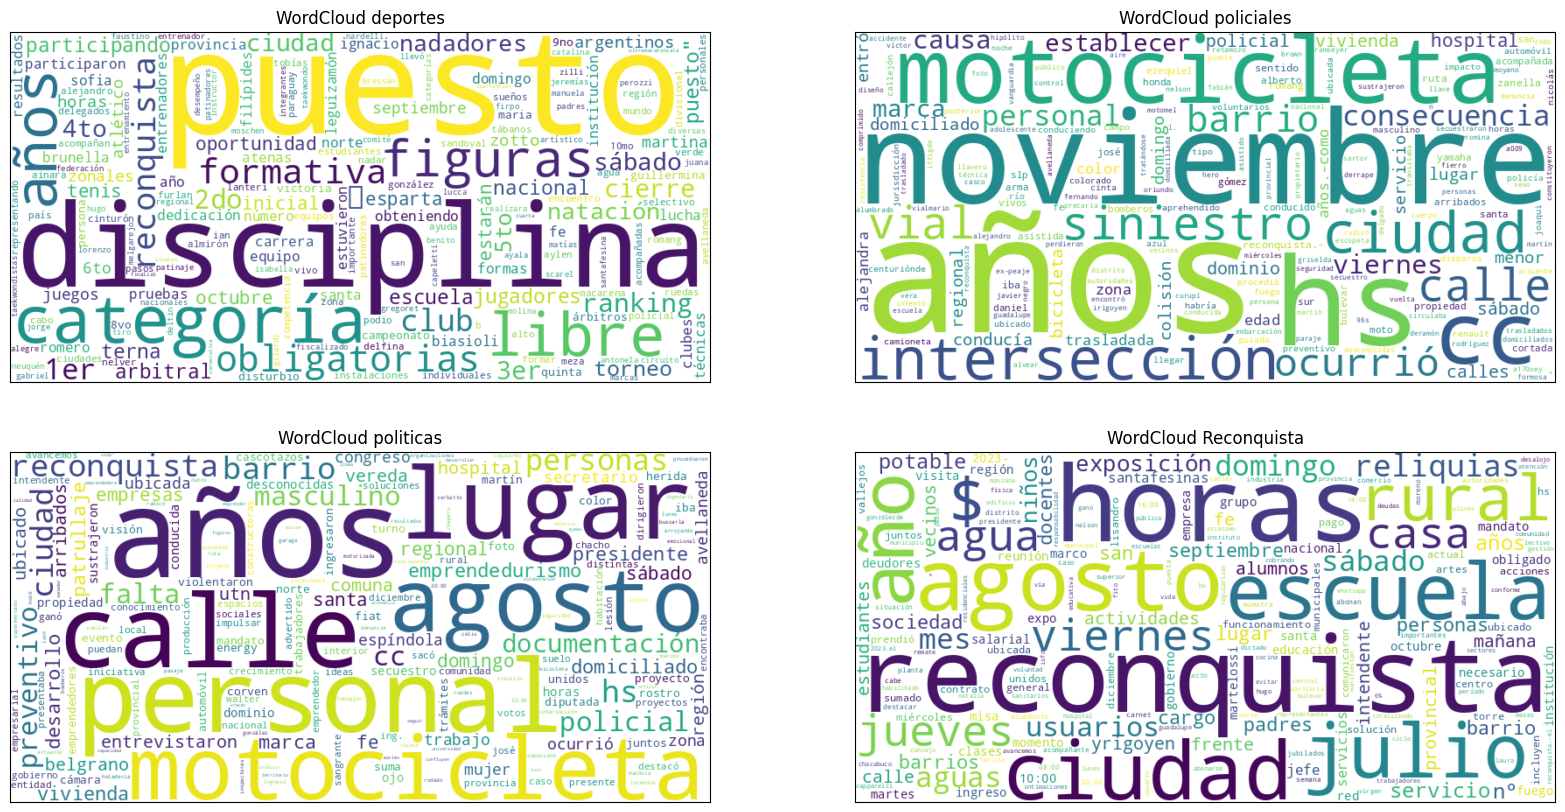

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_1 = WordCloud(width=800, height=400, background_color='white')
wordcloud_2 = WordCloud(width=800, height=400, background_color='white')
wordcloud_3 = WordCloud(width=800, height=400, background_color='white')
wordcloud_4 = WordCloud(width=800, height=400, background_color='white')

wordcloud_1.generate_from_frequencies(contador_palabras_dep)
wordcloud_2.generate_from_frequencies(contador_palabras_policial)
wordcloud_3.generate_from_frequencies(contador_palabras_politicas)
wordcloud_4.generate_from_frequencies(contador_palabras_rec)

plt.figure(figsize=(20, 10))
ax1 = plt.subplot(221); plt.xticks([]), plt.yticks([]), plt.imshow(wordcloud_1, interpolation='bilinear'), plt.title('WordCloud deportes')
plt.subplot(222,sharex=ax1,sharey=ax1), plt.imshow(wordcloud_2, interpolation='bilinear'), plt.title('WordCloud policiales')
plt.subplot(223,sharex=ax1,sharey=ax1), plt.imshow(wordcloud_3, interpolation='bilinear'), plt.title('WordCloud politicas')
plt.subplot(224,sharex=ax1,sharey=ax1), plt.imshow(wordcloud_4, interpolation='bilinear'), plt.title('WordCloud Reconquista')
plt.show()

### Conclusiones

En las nubes de palabras podemos identificar rápidamente las categorías que representan cada una. En algunos casos vemos que hay palabras relevantes repetidas como es el caso de "años". Esto puede llevar al modelo a una mala clasificación en algunos casos (de hecho, esto se observa en las pruebas de clasificación del punto anterior).

Para mejorar esta situación, se podría trabajar con más noticias para intentar obtener una mejor distinción de las categorías, especialmente entre Policiales y Políticas.

# Similitud entre los títulos de las noticias de una de las categorías.
A partir de un Modelo de embedding, se busca obtener la similitud entre los títulos de las noticias de una categoría específica.


In [26]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f20897b810685a32312b311edb2b2d72d572afc765ab3197524dfe5f53e05834
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [27]:
# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Definimos una lista de oraciones de una categoría
oraciones = []
for i in df_deportes['titulo']:
  oraciones.append(i)

## --------------------------------
# Elección de otras categorias:
# for i in df_policiales['titulo']:
#   oraciones.append(i)
# for i in df_politicas['titulo']:
#   oraciones.append(i)
# for i in df_reconquista['titulo']:
#   oraciones.append(i)

In [28]:
# Codificamos las oraciones
embeddings = modelo.encode(oraciones, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
puntuaciones_coseno = util.cos_sim(embeddings, embeddings)

# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(puntuaciones_coseno)-1):
  for j in range(i+1, len(puntuaciones_coseno)):
    pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Titulos 1", "Titulos 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
  i, j = par['index']
  tabla.add_row([oraciones[i], oraciones[j], f"{par['score']:.4f}"])

print(tabla)

+-------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                  Titulos 1                                                  |                                                  Titulos 2                                                   | Puntuación de Similitud |
+-------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------+-------------------------+
|      Nadadores del Reconquista Tenis Club dijeron presente en el Torneo de Natación del Club San Jorge      |           Nadadores del Reconquista Tenis Club estarán participando en el Club Atlético San Jorge            |          0.8850         |
|   

### Conclusiones

Al haber usado un sitio de noticias en su mayoría de la localidad de Reconquista el aprendizaje del leguaje propio de cada categoría se nota un poco limitado. Esto sumado a la relativamente baja cantidad de noticias para cada caso.

El caso más notorio es en las noticias Policiales. No se pudo clasificar correctamente la frase sobre el enfrentamiento entre policías y ladrones frente a un robo, probablemente porque las noticias utilizadas estén más relacionadas con delitos menores. Esto se observa en la nube de palabras, donde "motocicleta" o "años" son palabras destacadas, y no así "robo", "policía", "ladrones".

Sí se encuentra una mejor representación en las noticias de las otras categorías. Esto creemos que se debe a que los hechos relatados en las noticias y el lenguaje utilizado es mucho más cercano al utilizado en noticias, por ejemplo, de nivel nacional.

# Resumen de noticias de una categoría seleccionada por usuario

Se utilizará **resumen Abstractivo**, ya que consideramos que de esta manera obtenemos un modelo de comprensión más profunda de los textos del dataset. El resultado no consta simplemente de extractos de las noticias, sino que también agrega contexto al resumen aplicado, evitando así la información redundante. Utilizando un buen modelo de lenguaje es posible analizar diversos temas (como es el caso de este TP) y los resultados son accesibles y de fácil interpretación.

In [29]:
# Importamos las bibliotecas necesarias
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Nombre del modelo que vamos a utilizar para el resumen
model_name = "csebuetnlp/mT5_multilingual_XLSum"

# Cargamos el tokenizador y el modelo del nombre especificado
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [31]:
# Definimos una función para manejar y limpiar espacios en blanco y saltos de línea
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

def resumen(data):
  '''Función para resumir textos de las noticias.
     Se utiliza modelo multilingüe de XL-Sum
     En primer lugar se tokeniza el texto utilizando AutoTokenizer
     Luego se genera el resumen usando método generate() de AutoModelForSeq2SeqLM
     Por último se decofica con el método decode() de AutoTokenizer
  '''
  j=0
  for i in data['cuerpo']:
    if j >= 10: # Limitamos a 10 noticias
      break
    j=j+1
    # Convertimos el texto del artículo en IDs de entrada usando el tokenizador
    input_ids = tokenizer(
        [WHITESPACE_HANDLER(i)],
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=512)["input_ids"]

    # Generamos el resumen usando el modelo
    output_ids = model.generate(
        input_ids=input_ids,
        max_length=84,
        no_repeat_ngram_size=2,
        num_beams=4)[0]

    # Decodificamos los IDs de salida para obtener el resumen en texto
    summary = tokenizer.decode(
        output_ids,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False)

    print(f'Resumen {j}:\n{summary}\n')


# Solicitar la entrada del usuario

while True:
  print('Seleccione la categoría que desee: ')
  print('1: Deportes')
  print('2: Policiales')
  print('3: Políticas')
  print('4: Reconquista')
  print('0: Salir')
  categoria_elegida = input()

  if categoria_elegida == '1':
      resumen(df_deportes)
  elif categoria_elegida == '2':
      resumen(df_policiales)
  elif categoria_elegida == '3':
      resumen(df_politicas)
  elif categoria_elegida == '4':
      resumen(df_reconquista)
  elif categoria_elegida == '0':
      print("Hasta luego!")
      break
  else:
      print('¡Ups! La categoría no es válida.')


Seleccione la categoría que desee: 
1: Deportes
2: Policiales
3: Políticas
4: Reconquista
0: Salir
1
Resumen 1:
El Regatas Americanas de Corrientes, en el norte de Argentina, anunció este sábado que participará en un torneo de doble jornada.

Resumen 2:
Cuatro nadadores de Paraguay participarán en el Circuito Regional Centenario de Natación (NEA, por sus siglas en inglés).

Resumen 3:
En nuestra provincia de Buenos Aires, los patinadores de la zona están participando en la final de una copa de béisbol.

Resumen 4:
La Federación Santafesina de Natación anunció este viernes la apertura del torneo de natción de mujeres que se celebra en la ciudad de San Jorge.

Resumen 5:
El equipo de entrenamientos del Reconquista Tenis Club de Santa Fe se convirtió este miércoles en el primer nadador de la provincia en participar en un Torneo de Natación.

Resumen 6:
Cuatro taekwondistas de la Escuela de Taekwondo de Avellaneda, en Paraguay, se consagraron campeones del torneo nacional.

Resumen 7:
El u